In [1]:
from enum import Enum
import random 
import matplotlib.pylab as plt
import scipy.sparse as sparse


max_x = 100
max_y = 100
Matrix = [[None for x in range(max_x)] for y in range(max_y)] 
pop_size = 1000
init_infect_rate = 0.002
death_rate = 0.03
mean_infect_duration = 10
num_of_runs = 200
mobilitiy = 100 # %
stat_rate = 0  # population stationary rate 0-1


class Status(Enum):
    HEALTH = 1
    INFECTED = 2
    IMMUNE = 3
    DIED = 4
    


In [2]:
# import sys  
# !{sys.executable} -m pip install scipy

In [3]:
class Location:
    def __init__(self):
        while True:
            self.x = random.randrange(0,100)
            self.y = random.randrange(0,100) # generate number from 0 to 99
            if Matrix[self.x][self.y] is None:
                break
    def set_location(self, x, y):
        self.x = x
        self.y = y

In [4]:
class Direction:
    def __init__(self):
        self.x = random.choice([-1,0,1])
        self.y = random.choice([-1,0,1])
        while self.x == 0 and self.y == 0:
            self.x = random.choice([-1,0,1])
            self.y = random.choice([-1,0,1])
    
    def reset(self):
        self.x = random.choice([-1,0,1])
        self.y = random.choice([-1,0,1])
        while self.x == 0 and self.y == 0:
            self.x = random.choice([-1,0,1])
            self.y = random.choice([-1,0,1])
        

In [5]:
class Person:
    def __init__(self):
        self.location = Location()
        self.can_move = True
        self.status = Status.HEALTH
        self.move_dir = Direction()
        self.num_days_after_infect = 0
    
    # return False if died
    # return True if alive
    def check_status(self):
        if self.status == Status.INFECTED:
            self.num_days_after_infect += 1
            # TODO: need to transfer mean infect duration to specific infect duration
            if self.num_days_after_infect == mean_infect_duration:
                # DIED or IMMUNE
                if (random.randrange(0,100)) < (death_rate*100):
                    self.status = Status.DIED
                    return False
                else:
                    self.status = Status.IMMUNE
                    self.num_days_after_infect = 0
                    return True
        return True
        
    def move(self):
        if not self.can_move or random.randrange(0,100) > mobilitiy:
            return
        
        new_y = self.location.y + self.move_dir.y
        new_x = self.location.x + self.move_dir.x

        # check if out of bound
        if new_y >= max_y or new_y < 0 or new_x >= max_x or new_x < 0:
            # change direction
            self.move_dir.reset()

        # check if collision with others
        elif not Matrix[new_x][new_y] is None:
            someone = Matrix[new_x][new_y]
            # if self is health
            if self.status == Status.HEALTH:
                # if the other one is infected, then self will be infected by someone
                if someone.status == Status.INFECTED:
                    self.status = Status.INFECTED
            # if self is infected
            elif self.status == Status.INFECTED:
                # if some one is infected, then he will be infected by self
                if someone.status == Status.HEALTH:
                    someone.status = Status.INFECTED
                    
            # change direction
            self.move_dir.reset()
            
        else: # no collision
            Matrix[new_x][new_y] = Matrix[self.location.x][self.location.y]
            Matrix[self.location.x][self.location.y] = None
            self.location.set_location(new_x, new_y)
            
                        

In [6]:
def draw_graph(turn):
    print("turn:",turn)
    # create a figure and axis
    if turn%10 == 0:
        fig, ax = plt.subplots()
    # plot each data-point
    count = 0
    health_count = 0
    infect_count = 0
    immune_count = 0
    death_count = 0
    colors = {'HEALTH':'g', 'INFECTED':'r', 'IMMUNE':'b'}
    for i in range(max_x):
        for j in range(max_y):
            if not Matrix[i][j] is None:
                person = Matrix[i][j]
                if (person.status == Status.INFECTED):
                    infect_count += 1
                elif person.status == Status.HEALTH:
                    health_count += 1
                elif person.status == Status.DIED:
                    death_count += 1
                elif person.status == Status.IMMUNE:
                    immune_count += 1
                if turn%10 == 0:
                    ax.scatter(person.location.x,person.location.y,color=colors[person.status.name])
                count += 1
    print("Total infected people count = ", infect_count )
    print("Total health people count = ", health_count )
    print("Total immune people count = ", immune_count )
    print("Total died people count = ", death_count )
    print("Total people count = ",count)
    
    # set a title and labels
    if turn%10 == 0:
        title = 'period ' +str(turn)
        ax.set_title(title)

1000
total people =  1000
init infect count = 2
total number of state people =  0
turn: -1
Total infected people count =  2
Total health people count =  998
Total immune people count =  0
Total died people count =  0
Total people count =  1000
turn: 0
Total infected people count =  3
Total health people count =  997
Total immune people count =  0
Total died people count =  0
Total people count =  1000
turn: 1
Total infected people count =  3
Total health people count =  997
Total immune people count =  0
Total died people count =  0
Total people count =  1000
turn: 2
Total infected people count =  3
Total health people count =  997
Total immune people count =  0
Total died people count =  0
Total people count =  1000
turn: 3
Total infected people count =  5
Total health people count =  995
Total immune people count =  0
Total died people count =  0
Total people count =  1000
turn: 4
Total infected people count =  7
Total health people count =  993
Total immune people count =  0
Total d

Total infected people count =  36
Total health people count =  859
Total immune people count =  102
Total died people count =  0
Total people count =  997
turn: 51
Total infected people count =  36
Total health people count =  854
Total immune people count =  107
Total died people count =  0
Total people count =  997
turn: 52
Total infected people count =  37
Total health people count =  851
Total immune people count =  109
Total died people count =  0
Total people count =  997
turn: 53
Total infected people count =  41
Total health people count =  845
Total immune people count =  111
Total died people count =  0
Total people count =  997
turn: 54
Total infected people count =  36
Total health people count =  842
Total immune people count =  119
Total died people count =  0
Total people count =  997
turn: 55
Total infected people count =  35
Total health people count =  839
Total immune people count =  123
Total died people count =  0
Total people count =  997
turn: 56
Total infected p

Total infected people count =  12
Total health people count =  749
Total immune people count =  232
Total died people count =  0
Total people count =  993
turn: 101
Total infected people count =  16
Total health people count =  745
Total immune people count =  232
Total died people count =  0
Total people count =  993
turn: 102
Total infected people count =  20
Total health people count =  740
Total immune people count =  233
Total died people count =  0
Total people count =  993
turn: 103
Total infected people count =  18
Total health people count =  738
Total immune people count =  237
Total died people count =  0
Total people count =  993
turn: 104
Total infected people count =  20
Total health people count =  733
Total immune people count =  240
Total died people count =  0
Total people count =  993
turn: 105
Total infected people count =  20
Total health people count =  732
Total immune people count =  241
Total died people count =  0
Total people count =  993
turn: 106
Total infe

Total infected people count =  2
Total health people count =  710
Total immune people count =  280
Total died people count =  0
Total people count =  992
turn: 151
Total infected people count =  2
Total health people count =  710
Total immune people count =  280
Total died people count =  0
Total people count =  992
turn: 152
Total infected people count =  2
Total health people count =  709
Total immune people count =  281
Total died people count =  0
Total people count =  992
turn: 153
Total infected people count =  3
Total health people count =  708
Total immune people count =  281
Total died people count =  0
Total people count =  992
turn: 154
Total infected people count =  3
Total health people count =  708
Total immune people count =  281
Total died people count =  0
Total people count =  992
turn: 155
Total infected people count =  3
Total health people count =  708
Total immune people count =  281
Total died people count =  0
Total people count =  992
turn: 156
Total infected p

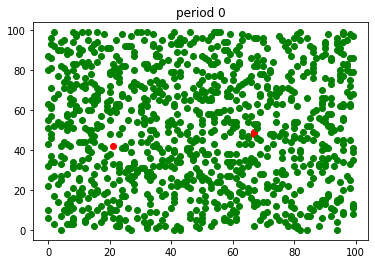

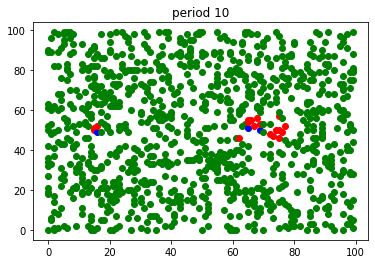

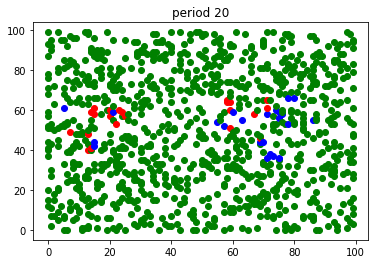

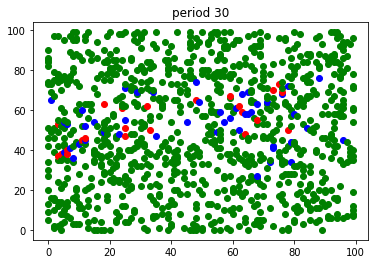

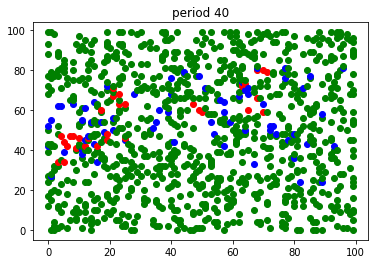

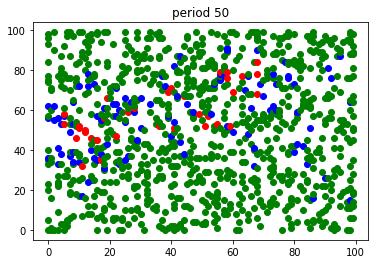

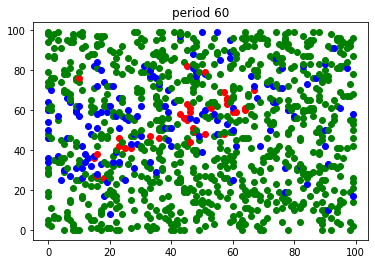

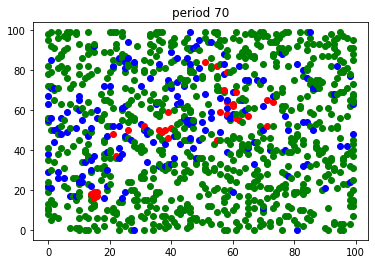

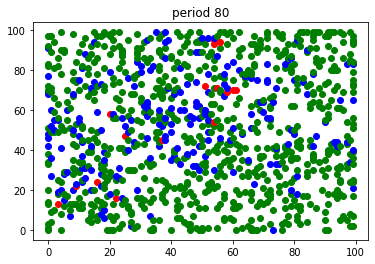

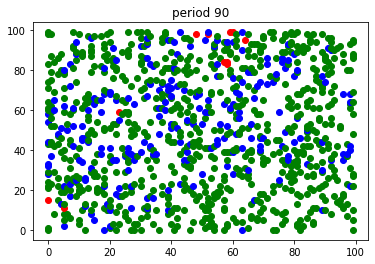

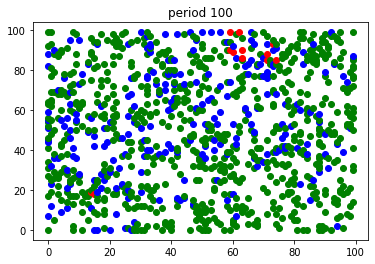

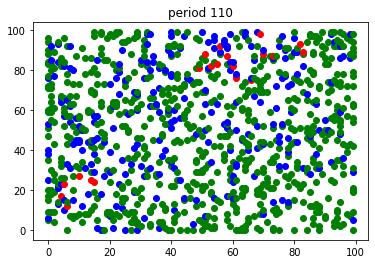

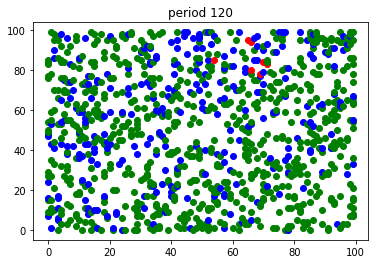

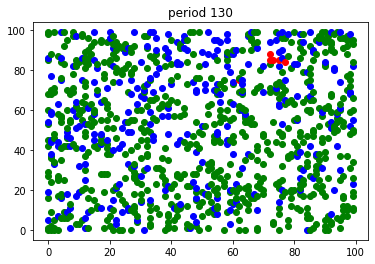

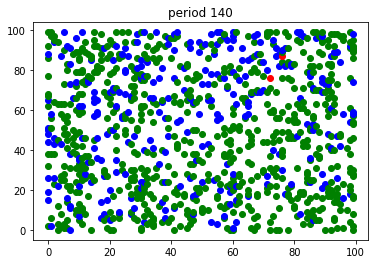

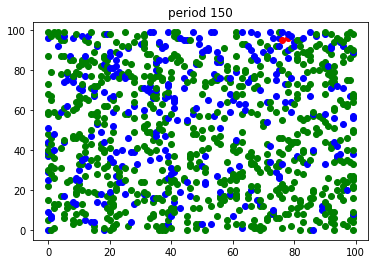

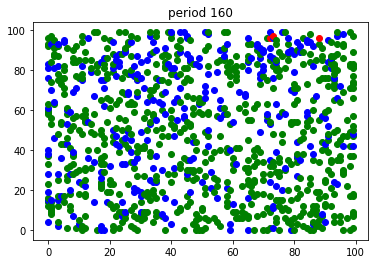

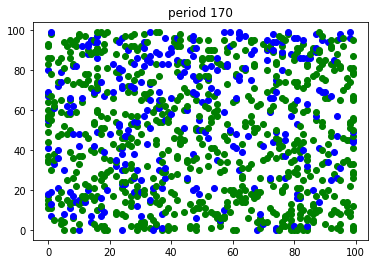

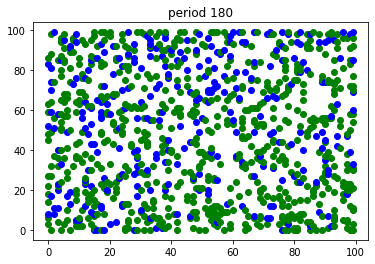

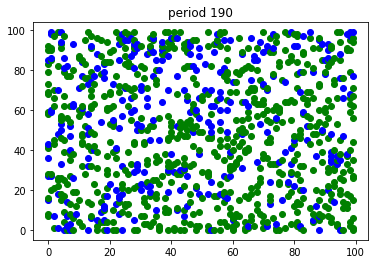

In [7]:
def main():
    people = []
    for _ in range(pop_size):
        person = Person()
        Matrix[person.location.x][person.location.y] = person
        people.append(person)
    
    init_infected_count = int(init_infect_rate * pop_size)
    print(len(people))
    print('total people = ', pop_size)
    print('init infect count =',init_infected_count)
    # since location of a person is randomly assigned
    # we can choose the first k person as infected person to remain randomness
    infect_indexes = random.sample(range(pop_size), init_infected_count)
    for i in infect_indexes:
        people[i].status = Status.INFECTED
    
    state_count = int(stat_rate * pop_size)
    print('total number of state people = ', state_count)
    state_indexes = random.sample(range(pop_size), state_count)
    for i in state_indexes:
        people[i].can_move = False;
        
    draw_graph(-1)
    
    for run in range(num_of_runs):
        for i in range(pop_size):
            someone = people[i]
            
            if someone.status == Status.DIED: # someone already died, skip
              #  print (i,' has died')
                continue
            if not someone.check_status(): # someone died in this turn, remove it from map
              #  print (i,' died')
                Matrix[someone.location.x][someone.location.y] = None
            someone.move()
     
        draw_graph(run)
            
            
                
        
     
    

if __name__ == "__main__":
    main()

In [8]:
# m = [] 
# m.append(Direction())
# m.append(Direction())
# print(m[0].x, m[0].y)
# print(m[1].x, m[1].y)
# a = m[0]
# a.x = 5
# print(m[0].x, m[0].y)
# a.y = 10
# print(m[0].x, m[0].y)
# m.remove(a)
# print(m[0].x, m[0].y)


In [9]:
# a = random.sample(range(1000), 100)
# for u in a:
#     print(u)
print(random.choice([-1,1]))

-1
